In [81]:
pwd

'/Users/stanleytan/Dropbox/bootcampspot/4-Project/3rd_project/first_step/3-data_analysis/prediction_2'

In [2]:
import pandas as pd

## <font color='green'>Loading CSVs </font>

In [3]:
df = pd.read_csv('old_data/abbr_games.csv')

In [4]:
# to get a better machine learnign model
#df_2 = pd.read_csv('box_score_2021_V3.csv')

In [6]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'VISITOR_ABBR', 'HOME_ABBR', 'MARGIN'],
      dtype='object')

In [194]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


TUTORIAL
```python
df['MARGIN'] = 0
for ind in df.index: 
    df['MARGIN'][ind] = df['PTS_home'][ind] - df['PTS_away'][ind]
```

In [195]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'VISITOR_ABBR', 'HOME_ABBR', 'MARGIN'],
      dtype='object')

In [196]:
df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,VISITOR_ABBR,HOME_ABBR,MARGIN
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,0.425,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1,CHA,ORL,3.0
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,0.295,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1,DET,WAS,3.0
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,0.396,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0,ATL,MEM,-1.0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,0.262,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0,PHI,IND,-6.0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,0.356,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0,MIA,TOR,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,NOP,ATL,6.0
23516,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,WAS,CHI,-4.0
23517,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,DEN,LAL,3.0
23518,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,SAC,TOR,5.0


In [5]:
training_columns = ['PTS_home', 'FG_PCT_home', 'FG3_PCT_home', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'MARGIN', 'HOME_TEAM_WINS']

### Grabbing training data


In [6]:
mask = (df['GAME_DATE_EST'] < '2020-08-16')

In [7]:
df2 = df.loc[mask]
df2 = df2.head(800)
df2 = df2[['PTS_home', 'FG_PCT_home', 'FG3_PCT_home', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'MARGIN', 'HOME_TEAM_WINS']]

In [14]:
df2

,PTS_home,FG_PCT_home,FG3_PCT_home,PTS_away,FG_PCT_away,FG3_PCT_away,MARGIN,HOME_TEAM_WINS
132,126.0,0.452,0.375,122.0,0.489,0.560,4.0,1
133,117.0,0.500,0.514,109.0,0.414,0.421,8.0,1
134,109.0,0.483,0.395,92.0,0.356,0.263,17.0,1
135,107.0,0.400,0.324,103.0,0.358,0.318,4.0,1
136,96.0,0.438,0.250,134.0,0.563,0.474,-38.0,0
...,...,...,...,...,...,...,...,...
927,104.0,0.474,0.462,87.0,0.400,0.280,17.0,1
928,86.0,0.451,0.409,107.0,0.571,0.429,-21.0,0
929,92.0,0.516,0.476,111.0,0.594,0.450,-19.0,0
930,96.0,0.439,0.462,98.0,0.529,0.421,-2.0,0


In [8]:
import scipy.stats as st

In [9]:
#required to load dependencies
X = df2.drop('HOME_TEAM_WINS', axis=1)
y = df2['HOME_TEAM_WINS'].values.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [11]:
X_train

,PTS_home,FG_PCT_home,FG3_PCT_home,PTS_away,FG_PCT_away,FG3_PCT_away,MARGIN
264,121.0,0.506,0.486,105.0,0.402,0.344,16.0
482,137.0,0.565,0.500,106.0,0.434,0.342,31.0
337,110.0,0.390,0.310,111.0,0.418,0.273,-1.0
560,127.0,0.534,0.414,106.0,0.429,0.286,21.0
659,112.0,0.490,0.300,115.0,0.527,0.250,-3.0
...,...,...,...,...,...,...,...
847,116.0,0.494,0.350,109.0,0.432,0.375,7.0
899,108.0,0.537,0.371,95.0,0.415,0.167,13.0
204,106.0,0.462,0.233,108.0,0.419,0.414,-2.0
367,118.0,0.441,0.295,109.0,0.453,0.296,9.0


In [12]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
X_scaled = X_scaler.transform(X)

In [14]:
X_scaled[0]

array([ 1.08799905, -0.25391726,  0.20174157,  0.87000956,  0.52368443,
        2.43871553,  0.19343813])

In [15]:
len(X_train_scaled)

600

In [16]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()

In [17]:
classifier.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [18]:
classifier.score(X_train_scaled, y_train_scaled)

0.6542389876077879

In [19]:
classifier.score(X_test_scaled, y_test_scaled)

0.668901351149765

In [20]:
predictions = classifier.predict(X_test_scaled)

In [21]:
predicted_df = pd.DataFrame({"Prediction": predictions.flatten(), "Actual": y_test.flatten()})[['Prediction', 'Actual']].reset_index(drop=True)

In [22]:
predicted_df

,Prediction,Actual
0,1.471210,1
1,1.696586,1
2,0.322207,1
3,0.851389,1
4,0.591108,1
...,...,...
195,-1.554379,0
196,2.619179,1
197,-0.575768,0
198,-2.419525,0


In [23]:
for ind in predicted_df.index: 
    if predicted_df['Prediction'][ind] > 0.1:
        predicted_df['Prediction'][ind] = 1
    else:
        predicted_df['Prediction'][ind] = 0

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
predicted_df

,Prediction,Actual
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
195,0.0,0
196,1.0,1
197,0.0,0
198,0.0,0


It is python as type

```python
df.Weight = df.Weight.astype('int64') 
```


In [25]:
predicted_df['Prediction'] = predicted_df['Prediction'].astype('int64')

In [26]:
predicted_df.head()

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [36]:
```python
>>> from sklearn.metrics import accuracy_score
>>> y_pred = [0, 2, 1, 3]
>>> y_true = [0, 1, 2, 3]
>>> accuracy_score(y_true, y_pred)
0.5

SyntaxError: invalid syntax (<ipython-input-36-f66dd5415b5e>, line 1)

In [27]:
from sklearn.metrics import accuracy_score
predicted_values = predicted_df['Prediction'].tolist()
actual_values = predicted_df['Actual'].tolist()
accuracy_score(predicted_values, actual_values)

0.975

0.975

In [40]:
import pandas as pd

Running a prediction, copied and pasted from Excel. 

```python
df = pd.read_csv('example1.csv')
df['margin'] = 0
df['margin'] = df['PTS_home'] - df['PTS_away']
X_train_scaled_2 = X_scaler.transform(df)
classifier.predict(X_train_scaled_2)
```

Training had margin, so need to add that in 


LOADING IN CSV
```python
import pandas as pd
imported_predicted_df = pd.read_csv('predict_feb3_playoffs.csv')
imported_predicted_df = imported_predicted_df['PTS_home', 'FG_PCT_home', 'FG3_PCT_home', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'MARGIN']
X_train_scaled_2 = X_scaler.transform(imported_predicted_df)
classifier.predict(X_train_scaled_2)
```


In [28]:
import pandas as pd

In [29]:
imported_ml_df = pd.read_csv('predicted_values_for_prediction.csv')

In [30]:
imported_ml_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,45.093750,0.477933,0.805950,0.384467,25.300000,42.400000,0
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,43.857143,0.462286,0.720411,0.360089,23.875000,47.053571,0
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,41.531250,0.476708,0.797583,0.364250,24.375000,45.666667,1
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,44.714286,0.454118,0.811014,0.373055,26.722727,46.768182,1
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,46.416667,0.460887,0.733780,0.353988,22.630952,40.940476,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021-02-10,MIN,LAC,-0.353001,106.937063,107.290064,0.444579,0.744916,0.345358,24.283217,43.837413,0.466630,0.853277,0.358732,23.193910,40.746795,0
145,2021-02-10,CHI,NOP,0.214015,112.145833,111.931818,0.464259,0.790413,0.359074,24.979167,44.041667,0.457591,0.682886,0.386750,27.045455,41.340909,0
146,2021-02-10,DEN,CLE,6.059524,115.598485,109.538961,0.472850,0.790301,0.380754,26.617424,44.806818,0.469474,0.693016,0.399570,24.490260,45.522727,0
147,2021-02-10,LAL,OKC,3.608766,115.904221,112.295455,0.496807,0.752083,0.369138,25.891234,46.079545,0.457062,0.732784,0.333864,24.653409,49.573864,0


In [31]:
imported_ml_df2 = imported_ml_df[['PTS_home', 'FG_PCT_home', 'FG3_PCT_home', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'MARGIN']]

In [32]:
X_train_scaled_2 = X_scaler.transform(imported_ml_df2)
predictions2 = classifier.predict(X_train_scaled_2)

In [33]:
predictions2 = predictions2.flatten()
predictions2 = predictions2.tolist()

In [34]:
imported_ml_df['predicted'] = predictions2

In [35]:
pd.set_option('display.max_rows', None)


In [36]:
imported_predicted_df.to_csv('predicted_values.csv', index=False)

NameError: name 'imported_predicted_df' is not defined

In [37]:
imported_predicted_df.columns

NameError: name 'imported_predicted_df' is not defined

In [38]:
imported_ml_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,45.093750,0.477933,0.805950,0.384467,25.300000,42.400000,0,-0.908178
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,43.857143,0.462286,0.720411,0.360089,23.875000,47.053571,0,-0.537689
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,41.531250,0.476708,0.797583,0.364250,24.375000,45.666667,1,0.027632
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,44.714286,0.454118,0.811014,0.373055,26.722727,46.768182,1,-0.594797
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,46.416667,0.460887,0.733780,0.353988,22.630952,40.940476,1,0.276091
5,2021-01-22,TOR,MIA,-4.678571,109.714286,114.392857,0.435357,0.819071,0.364321,25.107143,42.678571,0.455286,0.770393,0.366268,25.285714,42.660714,1,-0.364658
6,2021-01-22,MIN,ATL,-4.880952,106.940476,111.821429,0.447786,0.726554,0.348143,24.136905,45.273810,0.442500,0.813500,0.336500,22.785714,45.357143,0,-0.344161
7,2021-01-22,SAS,DAL,1.402778,108.777778,107.375000,0.440222,0.754611,0.341958,25.222222,46.486111,0.447238,0.733850,0.322213,22.462500,45.887500,0,-0.020532
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,42.700893,0.455726,0.739958,0.337917,25.404762,50.065476,1,0.194138
9,2021-01-22,PHO,DEN,0.640278,111.062500,110.422222,0.472083,0.830882,0.384618,25.097222,42.888889,0.488517,0.754678,0.381700,26.900000,40.061111,0,-0.060302


In [39]:
imported_ml_df['converted_predicted'] = 0


In [40]:
for ind in imported_ml_df.index:
    if imported_ml_df['predicted'][ind] > 0.1:
        imported_ml_df['converted_predicted'][ind] = 1
    else:
        imported_ml_df['converted_predicted'][ind] = 0

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
imported_ml_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,45.093750,0.477933,0.805950,0.384467,25.300000,42.400000,0,-0.908178,0
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,43.857143,0.462286,0.720411,0.360089,23.875000,47.053571,0,-0.537689,0
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,41.531250,0.476708,0.797583,0.364250,24.375000,45.666667,1,0.027632,0
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,44.714286,0.454118,0.811014,0.373055,26.722727,46.768182,1,-0.594797,0
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,46.416667,0.460887,0.733780,0.353988,22.630952,40.940476,1,0.276091,1
5,2021-01-22,TOR,MIA,-4.678571,109.714286,114.392857,0.435357,0.819071,0.364321,25.107143,42.678571,0.455286,0.770393,0.366268,25.285714,42.660714,1,-0.364658,0
6,2021-01-22,MIN,ATL,-4.880952,106.940476,111.821429,0.447786,0.726554,0.348143,24.136905,45.273810,0.442500,0.813500,0.336500,22.785714,45.357143,0,-0.344161,0
7,2021-01-22,SAS,DAL,1.402778,108.777778,107.375000,0.440222,0.754611,0.341958,25.222222,46.486111,0.447238,0.733850,0.322213,22.462500,45.887500,0,-0.020532,0
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,42.700893,0.455726,0.739958,0.337917,25.404762,50.065476,1,0.194138,1
9,2021-01-22,PHO,DEN,0.640278,111.062500,110.422222,0.472083,0.830882,0.384618,25.097222,42.888889,0.488517,0.754678,0.381700,26.900000,40.061111,0,-0.060302,0


* Is it better at predicting home wins or losses?

TUTORIAL
```python

mask2 = (df['DATE'] <= '2021-01-21')
df_second = df.loc[mask2]

```

In [42]:
imported_ml_df.head(1)

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted
0,2021-01-22,CHO,CHI,-14.4875,105.3125,119.8,0.442719,0.690063,0.359312,28.125,45.09375,0.477933,0.80595,0.384467,25.3,42.4,0,-0.908178,0


In [43]:
from sklearn.metrics import accuracy_score
predicted_values = imported_ml_df['converted_predicted'].tolist()
actual_values = imported_ml_df['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.5503355704697986

In [44]:
wins = (imported_ml_df['converted_predicted'] == 1)
predicted_wins = imported_ml_df.loc[wins]

In [45]:
loss = (imported_ml_df['converted_predicted'] == 0)
predicted_losses = imported_ml_df.loc[loss]

In [50]:
imported_ml_df.loc[imported_ml_df['DATE'] == '2021-02-10']

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted
140,2021-02-10,WAS,TOR,4.658800,118.041667,113.382867,0.467604,0.754604,0.346313,25.291667,43.562500,0.461934,0.826212,0.379269,26.959790,44.734266,0,0.178582,1
141,2021-02-10,DAL,ATL,-1.019481,110.855519,111.875000,0.456994,0.760955,0.336713,22.644481,42.615260,0.447583,0.816300,0.325506,23.488462,45.103846,0,-0.128982,0
142,2021-02-10,BRK,IND,9.300000,121.000000,111.700000,0.499625,0.813725,0.402475,26.850000,45.375000,0.456467,0.757183,0.394617,26.250000,45.883333,0,0.480023,1
143,2021-02-10,MEM,CHO,-3.899964,107.705556,111.605519,0.451222,0.786297,0.349561,27.225000,44.405556,0.464705,0.746679,0.380398,28.881494,45.931818,0,-0.308020,0
144,2021-02-10,MIN,LAC,-0.353001,106.937063,107.290064,0.444579,0.744916,0.345358,24.283217,43.837413,0.466630,0.853277,0.358732,23.193910,40.746795,0,-0.127960,0
145,2021-02-10,CHI,NOP,0.214015,112.145833,111.931818,0.464259,0.790413,0.359074,24.979167,44.041667,0.457591,0.682886,0.386750,27.045455,41.340909,0,-0.060161,0
146,2021-02-10,DEN,CLE,6.059524,115.598485,109.538961,0.472850,0.790301,0.380754,26.617424,44.806818,0.469474,0.693016,0.399570,24.490260,45.522727,0,0.255009,1
147,2021-02-10,LAL,OKC,3.608766,115.904221,112.295455,0.496807,0.752083,0.369138,25.891234,46.079545,0.457062,0.732784,0.333864,24.653409,49.573864,0,0.165950,1
148,2021-02-10,PHO,MIL,-1.708916,110.579545,112.288462,0.467265,0.844996,0.364379,26.005682,45.649621,0.456608,0.754418,0.390638,24.594406,42.402098,0,-0.158445,0


In [52]:
del imported_ml_df['HOME_TEAM_WINS']

In [54]:
team_winning_percentage = {'PHI': 0.708,
  'MIL': 0.667,
  'BRK': 0.56,
  'BOS': 0.545,
  'IND': 0.5,
  'CHO': 0.48,
  'ATL': 0.478,
  'TOR': 0.45799999999999996,
  'NYK': 0.44,
  'CLE': 0.4,
  'MIA': 0.391,
  'CHI': 0.391,
  'ORL': 0.375,
  'WAS': 0.28600000000000003,
  'DET': 0.217,
  'UTA': 0.792,
  'LAL': 0.76,
  'LAC': 0.68,
  'PHO': 0.609,
  'SAS': 0.583,
  'POR': 0.545,
  'DEN': 0.522,
  'SAC': 0.522,
  'GSW': 0.5,
  'HOU': 0.478,
  'MEM': 0.474,
  'NOP': 0.455,
  'DAL': 0.44,
  'OKC': 0.435,
  'MIN': 0.25 }

In [58]:
imported_ml_df['Winning_PCT'] = 0.0

In [59]:
for ind in imported_ml_df.index:
    imported_ml_df['Winning_PCT'][ind] = team_winning_percentage[imported_ml_df['HOME_ABBR'][ind]]

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
predicted_values = imported_ml_df.loc[imported_ml_df['DATE'] == '2021-02-10']

In [63]:
end_a = len(predicted_values) + 1
a_ = list(range(1, end_a))
predicted_values['ID'] = a_

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
predicted_values

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,predicted,converted_predicted,Winning_PCT,ID
140,2021-02-10,WAS,TOR,4.658800,118.041667,113.382867,0.467604,0.754604,0.346313,25.291667,43.562500,0.461934,0.826212,0.379269,26.959790,44.734266,0.178582,1,0.286,1
141,2021-02-10,DAL,ATL,-1.019481,110.855519,111.875000,0.456994,0.760955,0.336713,22.644481,42.615260,0.447583,0.816300,0.325506,23.488462,45.103846,-0.128982,0,0.440,2
142,2021-02-10,BRK,IND,9.300000,121.000000,111.700000,0.499625,0.813725,0.402475,26.850000,45.375000,0.456467,0.757183,0.394617,26.250000,45.883333,0.480023,1,0.560,3
143,2021-02-10,MEM,CHO,-3.899964,107.705556,111.605519,0.451222,0.786297,0.349561,27.225000,44.405556,0.464705,0.746679,0.380398,28.881494,45.931818,-0.308020,0,0.474,4
144,2021-02-10,MIN,LAC,-0.353001,106.937063,107.290064,0.444579,0.744916,0.345358,24.283217,43.837413,0.466630,0.853277,0.358732,23.193910,40.746795,-0.127960,0,0.250,5
145,2021-02-10,CHI,NOP,0.214015,112.145833,111.931818,0.464259,0.790413,0.359074,24.979167,44.041667,0.457591,0.682886,0.386750,27.045455,41.340909,-0.060161,0,0.391,6
146,2021-02-10,DEN,CLE,6.059524,115.598485,109.538961,0.472850,0.790301,0.380754,26.617424,44.806818,0.469474,0.693016,0.399570,24.490260,45.522727,0.255009,1,0.522,7
147,2021-02-10,LAL,OKC,3.608766,115.904221,112.295455,0.496807,0.752083,0.369138,25.891234,46.079545,0.457062,0.732784,0.333864,24.653409,49.573864,0.165950,1,0.760,8
148,2021-02-10,PHO,MIL,-1.708916,110.579545,112.288462,0.467265,0.844996,0.364379,26.005682,45.649621,0.456608,0.754418,0.390638,24.594406,42.402098,-0.158445,0,0.609,9


In [65]:
predicted_values.columns

Index(['DATE', 'HOME_ABBR', 'VISITOR_ABBR', 'MARGIN', 'PTS_home', 'PTS_away',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'predicted', 'converted_predicted', 'Winning_PCT', 'ID'],
      dtype='object')

In [66]:
predicted_values = predicted_values[['DATE', 'HOME_ABBR', 'VISITOR_ABBR', 'MARGIN', 'PTS_home', 'PTS_away',
       'FG_PCT_home', 'FG_PCT_away', 'predicted', 'converted_predicted', 'Winning_PCT', 'ID']]

In [69]:
predicted_values = predicted_values.rename(columns={"Winning_PCT":"WINNING_PCT"})

In [ ]:
CREATE TABLE predicted_values (
    "ID" INT PRIMARY KEY, 
    "DATE" DATE,
    "HOME_ABBR" VARCHAR,
    "VISITOR_ABBR" VARCHAR,
    "MARGIN" INT,
    "PTS_home" INT,
    "PTS_away" INT,
    "FG_PCT_home" DOUBLE PRECISION,
    "FG_PCT_away" DOUBLE PRECISION,
    "PREDICTED" DOUBLE PRECISION,
    "CONVERTED_PREDICTED" DOUBLE PRECISION,
    "WINNING_PCT" DOUBLE PRECISION
);

In [70]:
predicted_values.to_csv('predicted_values.csv', index=False)

In [46]:
from sklearn.metrics import accuracy_score
predicted_values = predicted_losses['converted_predicted'].tolist()
actual_values = predicted_losses['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.5428571428571428

In [47]:
len(predicted_losses)

105

In [48]:
len(predicted_wins)

44

In [76]:
predicted_losses

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,...,0.460887,0.733780,0.353988,22.630952,40.940476,1,0.276091,1,0,0
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,...,0.455726,0.739958,0.337917,25.404762,50.065476,1,0.194138,1,0,0
10,2021-01-22,SAC,NYK,11.594048,113.725000,102.130952,0.479850,0.718025,0.373825,25.625000,...,0.424607,0.755274,0.300738,23.107143,44.630952,1,0.609365,1,0,0
11,2021-01-23,BRK,MIA,7.477814,120.299242,112.821429,0.495390,0.809508,0.399663,26.174242,...,0.455786,0.773607,0.372750,24.928571,42.892857,1,0.374919,1,0,0
14,2021-01-23,CHI,LAL,14.018750,116.800000,102.781250,0.458600,0.840950,0.372175,23.350000,...,0.440687,0.764281,0.338531,24.062500,42.343750,0,0.694198,1,0,0
19,2021-01-24,LAC,OKC,3.758929,115.488095,111.729167,0.486179,0.845917,0.428012,25.166667,...,0.461833,0.739583,0.335760,24.989583,49.864583,1,0.152300,1,0,0
20,2021-01-24,BOS,CLE,4.919643,110.062500,105.142857,0.455844,0.748750,0.359031,22.468750,...,0.450746,0.653812,0.385629,24.468750,46.758929,1,0.191477,1,0,0
22,2021-01-24,MIL,ATL,9.102679,119.424107,110.321429,0.494576,0.726665,0.398308,26.138393,...,0.440853,0.814009,0.327339,23.441964,44.861607,1,0.475924,1,0,0
24,2021-01-24,POR,NYK,10.881548,113.145833,102.264286,0.436469,0.816469,0.366000,21.520833,...,0.424682,0.749282,0.305446,22.907143,45.489286,1,0.509640,1,0,0
28,2021-01-25,BRK,MIA,6.534226,120.708333,114.174107,0.497146,0.809729,0.406896,26.645833,...,0.462348,0.780143,0.385955,25.785714,43.254464,1,0.319453,1,0,0


In [54]:
predicted_wins.head(1)

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125,...,0.460887,0.73378,0.353988,22.630952,40.940476,1,0.276091,1,0,0


In [49]:
from sklearn.metrics import accuracy_score
predicted_values = predicted_wins['converted_predicted'].tolist()
actual_values = predicted_wins['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.5681818181818182

In [64]:
predicted_wins['HOME_Winning_Pct'] = 0.0

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
team_winning_percentage = {'PHI': 0.708,
  'MIL': 0.667,
  'BRK': 0.56,
  'BOS': 0.545,
  'IND': 0.5,
  'CHO': 0.48,
  'ATL': 0.478,
  'TOR': 0.45799999999999996,
  'NYK': 0.44,
  'CLE': 0.4,
  'MIA': 0.391,
  'CHI': 0.391,
  'ORL': 0.375,
  'WAS': 0.28600000000000003,
  'DET': 0.217,
  'UTA': 0.792,
  'LAL': 0.76,
  'LAC': 0.68,
  'PHO': 0.609,
  'SAS': 0.583,
  'POR': 0.545,
  'DEN': 0.522,
  'SAC': 0.522,
  'GSW': 0.5,
  'HOU': 0.478,
  'MEM': 0.474,
  'NOP': 0.455,
  'DAL': 0.44,
  'OKC': 0.435,
  'MIN': 0.25 }

In [ ]:
team_winning_percentage

In [65]:
for ind in predicted_wins.index:
    predicted_wins['HOME_Winning_Pct'][ind] = team_winning_percentage[predicted_wins['HOME_ABBR'][ind]]

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TUTORIAL

```python

for ind in schedule_df.index: 
    schedule_df[''][ind] = team_to_abbreviation[schedule_df['HOME'][ind]]
    schedule_df['VISITOR_ABBR'][ind] = team_to_abbreviation[schedule_df['VISITOR'][ind]]
    
  ```

In [69]:
mask_winning = (predicted_wins['HOME_Winning_Pct'] > 0.5)
predicted_wins_df_2 = predicted_wins.loc[mask_winning]

In [70]:
from sklearn.metrics import accuracy_score
predicted_values = predicted_wins_df_2['converted_predicted'].tolist()
actual_values = predicted_wins_df_2['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.8333333333333334

In [71]:
len(predicted_wins_df_2)

18

In [47]:
imported_ml_df['margin_over'] = 0
imported_ml_df['fg_over'] = 0 

In [50]:
imported_ml_df.columns

Index(['DATE', 'HOME_ABBR', 'VISITOR_ABBR', 'MARGIN', 'PTS_home', 'PTS_away',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'predicted', 'converted_predicted', 'margin_over',
       'fg_over'],
      dtype='object')

In [51]:
for ind in imported_ml_df.index:
    if imported_ml_df['MARGIN'][ind] > 0:
        imported_ml_df['margin_over'][ind] = 1
    else:
        imported_ml_df['margin_over'][ind] = 0

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
for ind in imported_ml_df.index:
    if imported_ml_df['FG_PCT_home'][ind] > imported_ml_df['FG_PCT_away'][ind]:
        imported_ml_df['fg_over'][ind] = 1
    else:
        imported_ml_df['fg_over'][ind] = 0

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
imported_ml_df['converted_predicted'] = imported_ml_df['converted_predicted'].astype(float)
imported_ml_df['margin_over'] = imported_ml_df['margin_over'].astype(float)
imported_ml_df['fg_over'] = imported_ml_df['fg_over'].astype(float)

In [55]:
imported_ml_df['total'] = 0.0

In [56]:
for ind in imported_ml_df.index:
    imported_ml_df['total'][ind] = imported_ml_df['predicted'][ind] + \
    imported_ml_df['margin_over'][ind] + imported_ml_df['fg_over'][ind]

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
imported_ml_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total
0,2021-02-01,ATL,LAL,10.15,114.10,103.95,0.44670,0.83330,0.36690,23.75,...,0.720150,0.358800,23.50,41.30,0,0.444000,1.0,1.0,0.0,1.444000
1,2021-02-01,MIA,CHO,-10.60,101.20,111.80,0.46330,0.81365,0.35455,24.40,...,0.720500,0.417200,29.25,43.10,0,-0.649375,0.0,0.0,0.0,-0.649375
2,2021-02-01,CHI,NYK,11.95,114.05,102.10,0.47385,0.79435,0.40350,24.80,...,0.784150,0.308750,21.45,46.45,1,0.637699,1.0,1.0,1.0,2.637699
3,2021-02-01,CLE,MIN,-5.30,114.80,120.10,0.47895,0.76450,0.39405,23.25,...,0.760050,0.399250,25.20,46.45,1,-0.381096,0.0,0.0,0.0,-0.381096
4,2021-02-01,MIL,POR,-3.05,114.15,117.20,0.47570,0.71065,0.34305,25.25,...,0.822550,0.374900,25.90,46.60,1,-0.249868,0.0,0.0,0.0,-0.249868
5,2021-02-01,NOP,SAC,-3.20,115.70,118.90,0.48440,0.69320,0.34465,26.55,...,0.643850,0.421700,26.55,43.90,0,-0.240062,0.0,0.0,1.0,0.759938
6,2021-02-01,OKC,HOU,-2.60,106.65,109.25,0.43870,0.68415,0.33430,22.80,...,0.736350,0.323350,20.85,48.95,0,-0.226198,0.0,0.0,1.0,0.773802
7,2021-02-01,DAL,PHO,-4.10,108.05,112.15,0.47385,0.72765,0.31785,21.80,...,0.846350,0.373500,24.00,45.45,0,-0.302126,0.0,0.0,0.0,-0.302126
8,2021-02-01,SAS,MEM,9.00,114.30,105.30,0.48805,0.78700,0.38905,24.55,...,0.755525,0.361975,25.10,43.90,0,0.453897,1.0,1.0,1.0,2.453897
9,2021-02-02,ORL,TOR,-9.20,103.35,112.55,0.42215,0.78190,0.38875,25.20,...,0.813350,0.362850,26.50,42.50,0,-0.640490,0.0,0.0,0.0,-0.640490


In [61]:
mask3 = (imported_ml_df['MARGIN'] > 2)

In [58]:
for ind in imported_ml_df.index:
    if imported_ml_df['margin_over'][ind] == 1:
        imported_ml_df['total'][ind] = imported_ml_df['predicted'][ind] + imported_ml_df['margin_over'][ind] + imported_ml_df['fg_over'][ind]
    else:
        imported_ml_df['total'][ind] = imported_ml_df['predicted'][ind]

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [59]:
imported_ml_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total
0,2021-02-01,ATL,LAL,10.15,114.10,103.95,0.44670,0.83330,0.36690,23.75,...,0.720150,0.358800,23.50,41.30,0,0.444000,1.0,1.0,0.0,1.444000
1,2021-02-01,MIA,CHO,-10.60,101.20,111.80,0.46330,0.81365,0.35455,24.40,...,0.720500,0.417200,29.25,43.10,0,-0.649375,0.0,0.0,0.0,-0.649375
2,2021-02-01,CHI,NYK,11.95,114.05,102.10,0.47385,0.79435,0.40350,24.80,...,0.784150,0.308750,21.45,46.45,1,0.637699,1.0,1.0,1.0,2.637699
3,2021-02-01,CLE,MIN,-5.30,114.80,120.10,0.47895,0.76450,0.39405,23.25,...,0.760050,0.399250,25.20,46.45,1,-0.381096,0.0,0.0,0.0,-0.381096
4,2021-02-01,MIL,POR,-3.05,114.15,117.20,0.47570,0.71065,0.34305,25.25,...,0.822550,0.374900,25.90,46.60,1,-0.249868,0.0,0.0,0.0,-0.249868
5,2021-02-01,NOP,SAC,-3.20,115.70,118.90,0.48440,0.69320,0.34465,26.55,...,0.643850,0.421700,26.55,43.90,0,-0.240062,0.0,0.0,1.0,-0.240062
6,2021-02-01,OKC,HOU,-2.60,106.65,109.25,0.43870,0.68415,0.33430,22.80,...,0.736350,0.323350,20.85,48.95,0,-0.226198,0.0,0.0,1.0,-0.226198
7,2021-02-01,DAL,PHO,-4.10,108.05,112.15,0.47385,0.72765,0.31785,21.80,...,0.846350,0.373500,24.00,45.45,0,-0.302126,0.0,0.0,0.0,-0.302126
8,2021-02-01,SAS,MEM,9.00,114.30,105.30,0.48805,0.78700,0.38905,24.55,...,0.755525,0.361975,25.10,43.90,0,0.453897,1.0,1.0,1.0,2.453897
9,2021-02-02,ORL,TOR,-9.20,103.35,112.55,0.42215,0.78190,0.38875,25.20,...,0.813350,0.362850,26.50,42.50,0,-0.640490,0.0,0.0,0.0,-0.640490


In [64]:
# mask3 = (imported_predicted_df['] == 1)

In [60]:
mask4 = (imported_ml_df['total'] > 2)

In [61]:
configured_df2 = imported_ml_df.loc[mask4]

In [62]:
len(configured_df2)

19

## <font color='green'> Metrics </font>

In [63]:
from sklearn.metrics import accuracy_score
predicted_values = imported_ml_df['converted_predicted'].tolist()
actual_values = imported_ml_df['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.5079365079365079

In [64]:
from sklearn.metrics import accuracy_score
predicted_values = configured_df2['converted_predicted'].tolist()
actual_values = configured_df2['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.47368421052631576

SUMMARY

Very easy to predict strong teams vs bad teams

In [84]:
configured_df2['converted_predicted'] = configured_df2['converted_predicted'].astype(int)

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
configured_df2.columns

Index(['DATE', 'HOME_ABBR', 'VISITOR_ABBR', 'MARGIN', 'PTS_home', 'PTS_away',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'predicted', 'converted_predicted', 'margin_over',
       'fg_over', 'total'],
      dtype='object')

In [93]:
empty_2 = []

In [94]:
for ind in configured_df2.index:
    if configured_df2['converted_predicted'][ind] == configured_df2['HOME_TEAM_WINS'][ind]:
        empty_2.append(configured_df2['VISITOR_ABBR'][ind])

## <font color='green'> Teams that are predicted from the dataframe </font>

In [95]:
empty_2

['BOS',
 'OKC',
 'NYK',
 'MIA',
 'TOR',
 'OKC',
 'CLE',
 'ATL',
 'NYK',
 'MIA',
 'NYK',
 'LAL',
 'DAL',
 'DAL',
 'HOU',
 'UTA',
 'NYK',
 'POR']

In [90]:
configured_df2.loc[configured_df2['HOME_ABBR'] == 'UTA']

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total
36,2021-01-26,UTA,NYK,10.696609,113.956349,103.259740,0.463056,0.724929,0.394313,23.996032,49.908730,0.428289,0.760744,0.310458,22.607143,45.100649,1,0.532626,1,1.0,1.0,2.532626
47,2021-01-27,UTA,DAL,3.635732,113.340278,109.704545,0.457712,0.736219,0.386934,23.982639,50.163194,0.454356,0.752932,0.340970,22.560606,46.522727,1,0.115682,1,1.0,1.0,2.115682
62,2021-01-29,UTA,DAL,3.402778,113.527778,110.125000,0.458556,0.736500,0.387611,23.638889,50.111111,0.455333,0.760437,0.343833,22.458333,46.750000,1,0.103248,1,1.0,1.0,2.103248


In [ ]:
for ind in predicted_df.index: 
    if predicted_df['Prediction'][ind] > 0.1:
        predicted_df['Prediction'][ind] = 1
    else:
        predicted_df['Prediction'][ind] = 0

In [74]:
count_df= pd.DataFrame(columns=['empty'])

In [80]:
count_df['home_abbr'] = configured_df2['HOME_ABBR']

In [181]:
imported_predicted_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,...,0.805950,0.384467,25.300000,42.400000,0,-0.908178,0.0,0.0,0.0,-0.908178
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,...,0.720411,0.360089,23.875000,47.053571,0,-0.537689,0.0,0.0,0.0,-0.537689
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,...,0.797583,0.364250,24.375000,45.666667,1,0.027632,0.0,1.0,0.0,1.027632
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,...,0.811014,0.373055,26.722727,46.768182,1,-0.594797,0.0,0.0,1.0,0.405203
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,...,0.733780,0.353988,22.630952,40.940476,1,0.276091,1.0,1.0,1.0,2.276091
5,2021-01-22,TOR,MIA,-4.678571,109.714286,114.392857,0.435357,0.819071,0.364321,25.107143,...,0.770393,0.366268,25.285714,42.660714,1,-0.364658,0.0,0.0,0.0,-0.364658
6,2021-01-22,MIN,ATL,-4.880952,106.940476,111.821429,0.447786,0.726554,0.348143,24.136905,...,0.813500,0.336500,22.785714,45.357143,0,-0.344161,0.0,0.0,1.0,0.655839
7,2021-01-22,SAS,DAL,1.402778,108.777778,107.375000,0.440222,0.754611,0.341958,25.222222,...,0.733850,0.322213,22.462500,45.887500,0,-0.020532,0.0,1.0,0.0,0.979468
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,...,0.739958,0.337917,25.404762,50.065476,1,0.194138,1.0,1.0,1.0,2.194138
9,2021-01-22,PHO,DEN,0.640278,111.062500,110.422222,0.472083,0.830882,0.384618,25.097222,...,0.754678,0.381700,26.900000,40.061111,0,-0.060302,0.0,1.0,0.0,0.939698


In [79]:
vertical_stack.head()

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,margin_over_3,total
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,...,0.353988,22.630952,40.940476,1,0.250412,1.0,1.0,1.0,1.0,2.250412
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,...,0.337917,25.404762,50.065476,1,0.162199,1.0,1.0,1.0,1.0,2.162199
10,2021-01-22,SAC,NYK,11.594048,113.725000,102.130952,0.479850,0.718025,0.373825,25.625000,...,0.300738,23.107143,44.630952,1,0.577886,1.0,1.0,1.0,1.0,2.577886
11,2021-01-23,BRK,MIA,7.477814,120.299242,112.821429,0.495390,0.809508,0.399663,26.174242,...,0.372750,24.928571,42.892857,1,0.331044,1.0,1.0,1.0,1.0,2.331044
14,2021-01-23,CHI,LAL,14.018750,116.800000,102.781250,0.458600,0.840950,0.372175,23.350000,...,0.338531,24.062500,42.343750,0,0.689057,1.0,1.0,1.0,1.0,2.689057


In [75]:
len(configured_df2)

42

In [73]:
len(configured_df)

24

In [57]:
imported_predicted_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,margin_over_3,total
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,...,0.384467,25.300000,42.400000,0,-0.937274,0.0,0.0,0.0,0.0,-0.937274
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,...,0.360089,23.875000,47.053571,0,-0.541542,0.0,0.0,0.0,0.0,-0.541542
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,...,0.364250,24.375000,45.666667,1,0.013856,0.0,1.0,0.0,0.0,1.013856
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,...,0.373055,26.722727,46.768182,1,-0.639229,0.0,0.0,1.0,0.0,0.360771
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,...,0.353988,22.630952,40.940476,1,0.250412,1.0,1.0,1.0,1.0,2.250412
5,2021-01-22,TOR,MIA,-4.678571,109.714286,114.392857,0.435357,0.819071,0.364321,25.107143,...,0.366268,25.285714,42.660714,1,-0.386609,0.0,0.0,0.0,0.0,-0.386609
6,2021-01-22,MIN,ATL,-4.880952,106.940476,111.821429,0.447786,0.726554,0.348143,24.136905,...,0.336500,22.785714,45.357143,0,-0.378765,0.0,0.0,1.0,0.0,0.621235
7,2021-01-22,SAS,DAL,1.402778,108.777778,107.375000,0.440222,0.754611,0.341958,25.222222,...,0.322213,22.462500,45.887500,0,-0.028287,0.0,1.0,0.0,0.0,0.971713
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,...,0.337917,25.404762,50.065476,1,0.162199,1.0,1.0,1.0,1.0,2.162199
9,2021-01-22,PHO,DEN,0.640278,111.062500,110.422222,0.472083,0.830882,0.384618,25.097222,...,0.381700,26.900000,40.061111,0,-0.064509,0.0,1.0,0.0,0.0,0.935491


In [49]:
mask1 = (imported_predicted_df['total'] > 2)
second_high_prob = imported_predicted_df.loc[mask1]

In [50]:
second_high_prob

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,margin_over_3,total


In [119]:
from sklearn.metrics import accuracy_score
predicted_values = second_high_prob['converted_predicted'].tolist()
actual_values = second_high_prob['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.6923076923076923

In [121]:
len(high_prob_wins)

26

In [122]:
vertical_prob = pd.concat([high_prob_wins, second_high_prob], axis=0)

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [125]:
vertical_prob.columns

Index(['AST_away', 'AST_home', 'DATE', 'FG3_PCT_away', 'FG3_PCT_home',
       'FG_PCT_away', 'FG_PCT_home', 'FT_PCT_away', 'FT_PCT_home', 'HOME_ABBR',
       'HOME_TEAM_WINS', 'MARGIN', 'PTS_away', 'PTS_home', 'REB_away',
       'REB_home', 'VISITOR_ABBR', 'accuracy', 'converted_predicted',
       'fg_over', 'margin_over', 'margin_over_3', 'predicted', 'total'],
      dtype='object')

TUTORIAL
```python

df.drop_duplicates(subset=['brand'])
```

In [124]:
vertical_proba

,AST_away,AST_home,DATE,FG3_PCT_away,FG3_PCT_home,FG_PCT_away,FG_PCT_home,FT_PCT_away,FT_PCT_home,HOME_ABBR,HOME_TEAM_WINS,MARGIN,PTS_away,PTS_home,REB_away,REB_home,VISITOR_ABBR,accuracy,converted_predicted,fg_over,margin_over,margin_over_3,predicted,total
4,22.630952,26.125000,2021-01-22,0.353988,0.367333,0.460887,0.482875,0.733780,0.754708,PHI,1,6.059524,110.107143,116.166667,40.940476,46.416667,BOS,1.0,1.0,1.0,1.0,NaN,0.276091,2.276091
8,25.404762,25.593750,2021-01-22,0.337917,0.439179,0.455726,0.483741,0.739958,0.835406,LAC,1,4.471726,110.630952,115.102679,50.065476,42.700893,OKC,1.0,1.0,1.0,1.0,NaN,0.194138,2.194138
10,23.107143,25.625000,2021-01-22,0.300738,0.373825,0.424607,0.479850,0.755274,0.718025,SAC,1,11.594048,102.130952,113.725000,44.630952,41.475000,NYK,1.0,1.0,1.0,1.0,NaN,0.609365,2.609365
11,24.928571,26.174242,2021-01-23,0.372750,0.399663,0.455786,0.495390,0.773607,0.809508,BRK,1,7.477814,112.821429,120.299242,42.892857,45.931818,MIA,1.0,1.0,1.0,1.0,NaN,0.374919,2.374919
14,24.062500,23.350000,2021-01-23,0.338531,0.372175,0.440687,0.458600,0.764281,0.840950,CHI,0,14.018750,102.781250,116.800000,42.343750,45.125000,LAL,1.0,1.0,1.0,1.0,NaN,0.694198,2.694198
18,27.263393,25.708333,2021-01-24,0.368964,0.356542,0.454036,0.476958,0.813594,0.759875,IND,0,1.589286,111.910714,113.500000,45.120536,41.791667,TOR,1.0,0.0,1.0,1.0,NaN,0.034881,2.034881
19,24.989583,25.166667,2021-01-24,0.335760,0.428012,0.461833,0.486179,0.739583,0.845917,LAC,1,3.758929,111.729167,115.488095,49.864583,43.107143,OKC,1.0,1.0,1.0,1.0,NaN,0.152300,2.152300
20,24.468750,22.468750,2021-01-24,0.385629,0.359031,0.450746,0.455844,0.653812,0.748750,BOS,1,4.919643,105.142857,110.062500,46.758929,43.937500,CLE,1.0,1.0,1.0,1.0,NaN,0.191477,2.191477
22,23.441964,26.138393,2021-01-24,0.327339,0.398308,0.440853,0.494576,0.814009,0.726665,MIL,1,9.102679,110.321429,119.424107,44.861607,48.272321,ATL,1.0,1.0,1.0,1.0,NaN,0.475924,2.475924
24,22.907143,21.520833,2021-01-24,0.305446,0.366000,0.424682,0.436469,0.749282,0.816469,POR,1,10.881548,102.264286,113.145833,45.489286,43.760417,NYK,1.0,1.0,1.0,1.0,NaN,0.509640,2.509640


In [123]:
len(vertical_prob)

52

TUTORIAL
```python
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)
```

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
imported_predicted_df

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total
0,2021-01-22,CHO,CHI,-14.487500,105.312500,119.800000,0.442719,0.690063,0.359312,28.125000,45.093750,0.477933,0.805950,0.384467,25.300000,42.400000,0,-0.908178,0.0,0.0,0.0,-0.908178
1,2021-01-22,DET,HOU,-7.196429,107.392857,114.589286,0.414393,0.777071,0.347286,23.678571,43.857143,0.462286,0.720411,0.360089,23.875000,47.053571,0,-0.537689,0.0,0.0,0.0,-0.537689
2,2021-01-22,IND,ORL,1.958333,112.916667,110.958333,0.475250,0.749104,0.357542,25.385417,41.531250,0.476708,0.797583,0.364250,24.375000,45.666667,1,0.027632,0.0,1.0,0.0,1.027632
3,2021-01-22,CLE,BRK,-9.485065,105.428571,114.913636,0.454500,0.670143,0.363643,25.321429,44.714286,0.454118,0.811014,0.373055,26.722727,46.768182,1,-0.594797,0.0,0.0,1.0,0.405203
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,46.416667,0.460887,0.733780,0.353988,22.630952,40.940476,1,0.276091,1.0,1.0,1.0,2.276091
5,2021-01-22,TOR,MIA,-4.678571,109.714286,114.392857,0.435357,0.819071,0.364321,25.107143,42.678571,0.455286,0.770393,0.366268,25.285714,42.660714,1,-0.364658,0.0,0.0,0.0,-0.364658
6,2021-01-22,MIN,ATL,-4.880952,106.940476,111.821429,0.447786,0.726554,0.348143,24.136905,45.273810,0.442500,0.813500,0.336500,22.785714,45.357143,0,-0.344161,0.0,0.0,1.0,0.655839
7,2021-01-22,SAS,DAL,1.402778,108.777778,107.375000,0.440222,0.754611,0.341958,25.222222,46.486111,0.447238,0.733850,0.322213,22.462500,45.887500,0,-0.020532,0.0,1.0,0.0,0.979468
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,42.700893,0.455726,0.739958,0.337917,25.404762,50.065476,1,0.194138,1.0,1.0,1.0,2.194138
9,2021-01-22,PHO,DEN,0.640278,111.062500,110.422222,0.472083,0.830882,0.384618,25.097222,42.888889,0.488517,0.754678,0.381700,26.900000,40.061111,0,-0.060302,0.0,1.0,0.0,0.939698


In [99]:
mask = (imported_predicted_df['total'] > 2)

In [102]:
high_prob_wins = imported_predicted_df.loc[mask]

In [106]:
high_prob_wins['accuracy'] = 1

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
len(high_prob_wins)

26

In [108]:
from sklearn.metrics import accuracy_score
predicted_values = high_prob_wins['accuracy'].tolist()
actual_values = high_prob_wins['HOME_TEAM_WINS'].tolist()
accuracy_score(predicted_values, actual_values)

0.6538461538461539

In [109]:
high_prob_wins

,DATE,HOME_ABBR,VISITOR_ABBR,MARGIN,PTS_home,PTS_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,predicted,converted_predicted,margin_over,fg_over,total,accuracy
4,2021-01-22,PHI,BOS,6.059524,116.166667,110.107143,0.482875,0.754708,0.367333,26.125000,46.416667,0.460887,0.733780,0.353988,22.630952,40.940476,1,0.276091,1.0,1.0,1.0,2.276091,1
8,2021-01-22,LAC,OKC,4.471726,115.102679,110.630952,0.483741,0.835406,0.439179,25.593750,42.700893,0.455726,0.739958,0.337917,25.404762,50.065476,1,0.194138,1.0,1.0,1.0,2.194138,1
10,2021-01-22,SAC,NYK,11.594048,113.725000,102.130952,0.479850,0.718025,0.373825,25.625000,41.475000,0.424607,0.755274,0.300738,23.107143,44.630952,1,0.609365,1.0,1.0,1.0,2.609365,1
11,2021-01-23,BRK,MIA,7.477814,120.299242,112.821429,0.495390,0.809508,0.399663,26.174242,45.931818,0.455786,0.773607,0.372750,24.928571,42.892857,1,0.374919,1.0,1.0,1.0,2.374919,1
14,2021-01-23,CHI,LAL,14.018750,116.800000,102.781250,0.458600,0.840950,0.372175,23.350000,45.125000,0.440687,0.764281,0.338531,24.062500,42.343750,0,0.694198,1.0,1.0,1.0,2.694198,1
18,2021-01-24,IND,TOR,1.589286,113.500000,111.910714,0.476958,0.759875,0.356542,25.708333,41.791667,0.454036,0.813594,0.368964,27.263393,45.120536,0,0.034881,0.0,1.0,1.0,2.034881,1
19,2021-01-24,LAC,OKC,3.758929,115.488095,111.729167,0.486179,0.845917,0.428012,25.166667,43.107143,0.461833,0.739583,0.335760,24.989583,49.864583,1,0.152300,1.0,1.0,1.0,2.152300,1
20,2021-01-24,BOS,CLE,4.919643,110.062500,105.142857,0.455844,0.748750,0.359031,22.468750,43.937500,0.450746,0.653812,0.385629,24.468750,46.758929,1,0.191477,1.0,1.0,1.0,2.191477,1
22,2021-01-24,MIL,ATL,9.102679,119.424107,110.321429,0.494576,0.726665,0.398308,26.138393,48.272321,0.440853,0.814009,0.327339,23.441964,44.861607,1,0.475924,1.0,1.0,1.0,2.475924,1
24,2021-01-24,POR,NYK,10.881548,113.145833,102.264286,0.436469,0.816469,0.366000,21.520833,43.760417,0.424682,0.749282,0.305446,22.907143,45.489286,1,0.509640,1.0,1.0,1.0,2.509640,1


In [107]:
high_prob_wins.columns

Index(['DATE', 'HOME_ABBR', 'VISITOR_ABBR', 'MARGIN', 'PTS_home', 'PTS_away',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'predicted', 'converted_predicted', 'margin_over',
       'fg_over', 'total', 'accuracy'],
      dtype='object')

##### from sklearn.metrics import accuracy_score
predicted_values = imported_predicted_df['converted_predicted'].tolist()
actual_values = imported_predicted_df['HOME_TEAM_WINS'].tolist()
accuracy_var = accuracy_score(predicted_values, actual_values)
print(f'The accuracy is 56% from accuracy_var')

Tutorial <br>

Prediction
```python



predictions_check_df = imported_predicted_df[['HOME_TEAM_WINS']]


imported_predicted_df = imported_predicted_df.drop(columns=['HOME_TEAM_WINS'])
imported_predicted_df

imported_predicted_df = imported_predicted_df[['PTS_home', 'PTS_away', 'margin', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']]

X_train_scaled_2 = X_scaler.transform(imported_predicted_df)
classifier.predict(X_train_scaled_2)

```

Convert the products into a dataframe
```python
np_list = classifier.predict(X_train_scaled_2)
np_list = np_list.flatten()
np_list = np_list.tolist()
df_list = pd.DataFrame(np_list)
df_list
```


In [62]:
np_list = classifier.predict(X_train_scaled_2)
np_list = np_list.flatten()
np_list = np_list.tolist()
df_list = pd.DataFrame(np_list)
df_list

,0
0,-0.083454
1,-0.073903
2,0.232044
3,0.101831
4,0.472685
5,0.008517
6,0.506038
7,-0.259883


In [58]:
imported_predicted_df

,PTS_home,PTS_away,MARGIN,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,112.236271,112.685516,-0.449245,0.456124,0.798223,0.368931,24.955619,45.819604,0.451198,0.754610,0.351897,22.785714,46.879960
1,112.216954,110.723214,1.493740,0.484690,0.774672,0.354885,27.129598,43.432184,0.464827,0.783936,0.352328,22.449176,42.338599
2,114.676129,111.210648,3.465481,0.471092,0.791029,0.373330,23.350968,45.268065,0.470440,0.747228,0.359889,24.150794,43.665675
3,116.363103,111.824138,4.538966,0.466802,0.788983,0.383328,24.264138,47.350690,0.456220,0.778841,0.348532,24.296552,45.539655
4,118.564484,110.569063,7.995422,0.476249,0.748294,0.363407,26.373016,51.515873,0.475927,0.765973,0.374918,25.670313,44.618437
5,109.886015,110.565625,-0.679610,0.479650,0.773618,0.362572,26.440613,42.512452,0.457116,0.785148,0.373719,25.450000,43.087500
6,116.766284,107.410714,9.355569,0.449648,0.789205,0.342413,21.891762,43.857280,0.453437,0.788080,0.337116,23.428571,45.044643
7,114.697115,116.643369,-1.946254,0.481343,0.726190,0.349268,25.173764,46.258929,0.470386,0.789316,0.401977,25.935484,46.945341


In [6]:
df.head(100)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-08-29,41900105,Final,1610612749,1610612753,2019,1610612749,118.0,0.455,0.815,...,27.0,56.0,1610612753,104.0,0.394,0.714,0.366,22.0,47.0,1
96,2020-08-29,41900175,Final,1610612745,1610612760,2019,1610612745,114.0,0.430,0.643,...,28.0,55.0,1610612760,80.0,0.315,0.652,0.152,11.0,58.0,1
97,2020-08-29,41900145,Final,1610612747,1610612757,2019,1610612747,131.0,0.545,0.808,...,27.0,41.0,1610612757,122.0,0.473,0.808,0.481,20.0,43.0,1
98,2020-08-25,41900165,Final,1610612743,1610612762,2019,1610612743,117.0,0.506,0.938,...,22.0,38.0,1610612762,107.0,0.500,0.813,0.471,23.0,35.0,1


In [7]:
df2 = df.loc[df['GAME_DATE_EST'] < '2020-08-16']

In [8]:
df2 = df2.head(800)

In [9]:
len(df2)

800

In [10]:
df2.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [11]:
df2.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
132,2020-08-15,51900111,Final,1610612757,1610612763,2019,1610612757,126.0,0.452,0.854,...,20.0,39.0,1610612763,122.0,0.489,0.818,0.560,30.0,49.0,1
133,2020-08-14,21901318,Final,1610612761,1610612743,2019,1610612761,117.0,0.500,0.643,...,27.0,51.0,1610612743,109.0,0.414,0.913,0.421,27.0,41.0,1
134,2020-08-14,21901316,Final,1610612754,1610612748,2019,1610612754,109.0,0.483,0.727,...,32.0,51.0,1610612748,92.0,0.356,0.741,0.263,14.0,48.0,1
135,2020-08-14,21901317,Final,1610612746,1610612760,2019,1610612746,107.0,0.400,0.692,...,23.0,61.0,1610612760,103.0,0.358,0.591,0.318,18.0,48.0,1
136,2020-08-14,21901315,Final,1610612745,1610612755,2019,1610612745,96.0,0.438,0.875,...,25.0,27.0,1610612755,134.0,0.563,0.818,0.474,31.0,51.0,0


In [12]:
df2 = df2[['PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS']]

In [13]:
df2.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
132,126.0,0.452,0.854,0.375,20.0,39.0,122.0,0.489,0.818,0.560,30.0,49.0,1
133,117.0,0.500,0.643,0.514,27.0,51.0,109.0,0.414,0.913,0.421,27.0,41.0,1
134,109.0,0.483,0.727,0.395,32.0,51.0,92.0,0.356,0.741,0.263,14.0,48.0,1
135,107.0,0.400,0.692,0.324,23.0,61.0,103.0,0.358,0.591,0.318,18.0,48.0,1
136,96.0,0.438,0.875,0.250,25.0,27.0,134.0,0.563,0.818,0.474,31.0,51.0,0


In [14]:
df2.columns

Index(['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [15]:
df2.head(10)

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
132,126.0,0.452,0.854,0.375,20.0,39.0,122.0,0.489,0.818,0.560,30.0,49.0,1
133,117.0,0.500,0.643,0.514,27.0,51.0,109.0,0.414,0.913,0.421,27.0,41.0,1
134,109.0,0.483,0.727,0.395,32.0,51.0,92.0,0.356,0.741,0.263,14.0,48.0,1
135,107.0,0.400,0.692,0.324,23.0,61.0,103.0,0.358,0.591,0.318,18.0,48.0,1
136,96.0,0.438,0.875,0.250,25.0,27.0,134.0,0.563,0.818,0.474,31.0,51.0,0
137,90.0,0.398,0.857,0.229,22.0,51.0,96.0,0.386,0.750,0.385,22.0,56.0,0
138,122.0,0.490,0.733,0.429,29.0,47.0,136.0,0.568,0.583,0.447,37.0,44.0,0
139,119.0,0.500,0.696,0.394,36.0,55.0,106.0,0.398,0.652,0.317,27.0,45.0,1
140,128.0,0.551,0.762,0.412,34.0,45.0,102.0,0.438,0.842,0.308,17.0,43.0,1
141,118.0,0.465,0.900,0.326,25.0,43.0,112.0,0.494,0.667,0.500,24.0,44.0,1


In [16]:
df2.columns

Index(['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [17]:
df2 = df2[['PTS_home', 'PTS_away', 'HOME_TEAM_WINS', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away']]

In [18]:
df2.head(10)

,PTS_home,PTS_away,HOME_TEAM_WINS,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
132,126.0,122.0,1,0.452,0.854,0.375,20.0,39.0,0.489,0.818,0.560,30.0,49.0
133,117.0,109.0,1,0.500,0.643,0.514,27.0,51.0,0.414,0.913,0.421,27.0,41.0
134,109.0,92.0,1,0.483,0.727,0.395,32.0,51.0,0.356,0.741,0.263,14.0,48.0
135,107.0,103.0,1,0.400,0.692,0.324,23.0,61.0,0.358,0.591,0.318,18.0,48.0
136,96.0,134.0,0,0.438,0.875,0.250,25.0,27.0,0.563,0.818,0.474,31.0,51.0
137,90.0,96.0,0,0.398,0.857,0.229,22.0,51.0,0.386,0.750,0.385,22.0,56.0
138,122.0,136.0,0,0.490,0.733,0.429,29.0,47.0,0.568,0.583,0.447,37.0,44.0
139,119.0,106.0,1,0.500,0.696,0.394,36.0,55.0,0.398,0.652,0.317,27.0,45.0
140,128.0,102.0,1,0.551,0.762,0.412,34.0,45.0,0.438,0.842,0.308,17.0,43.0
141,118.0,112.0,1,0.465,0.900,0.326,25.0,43.0,0.494,0.667,0.500,24.0,44.0


In [20]:
df2['margin'] = 0
for ind in df2.index: 
    df2['margin'][ind] = df2['PTS_home'][ind] - df2['PTS_away'][ind]

/Users/stanleytan/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df2 = df2[['PTS_home', 'PTS_away', 'HOME_TEAM_WINS', 'margin', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away']]

In [22]:
df2.head(10)

,PTS_home,PTS_away,HOME_TEAM_WINS,margin,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
132,126.0,122.0,1,4,0.452,0.854,0.375,20.0,39.0,0.489,0.818,0.560,30.0,49.0
133,117.0,109.0,1,8,0.500,0.643,0.514,27.0,51.0,0.414,0.913,0.421,27.0,41.0
134,109.0,92.0,1,17,0.483,0.727,0.395,32.0,51.0,0.356,0.741,0.263,14.0,48.0
135,107.0,103.0,1,4,0.400,0.692,0.324,23.0,61.0,0.358,0.591,0.318,18.0,48.0
136,96.0,134.0,0,-38,0.438,0.875,0.250,25.0,27.0,0.563,0.818,0.474,31.0,51.0
137,90.0,96.0,0,-6,0.398,0.857,0.229,22.0,51.0,0.386,0.750,0.385,22.0,56.0
138,122.0,136.0,0,-14,0.490,0.733,0.429,29.0,47.0,0.568,0.583,0.447,37.0,44.0
139,119.0,106.0,1,13,0.500,0.696,0.394,36.0,55.0,0.398,0.652,0.317,27.0,45.0
140,128.0,102.0,1,26,0.551,0.762,0.412,34.0,45.0,0.438,0.842,0.308,17.0,43.0
141,118.0,112.0,1,6,0.465,0.900,0.326,25.0,43.0,0.494,0.667,0.500,24.0,44.0


In [23]:
df2.corr()

,PTS_home,PTS_away,HOME_TEAM_WINS,margin,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
PTS_home,1.000000,0.352853,0.482424,0.589209,0.688864,0.150141,0.545087,0.512208,0.147057,0.037244,0.050046,0.036229,0.115993,-0.284292
PTS_away,0.352853,1.000000,-0.439480,-0.548106,0.077917,0.046135,0.037220,0.103699,-0.283237,0.662337,0.238196,0.550597,0.469619,0.109254
HOME_TEAM_WINS,0.482424,-0.439480,1.000000,0.810743,0.470448,0.068287,0.382643,0.261852,0.291604,-0.444391,-0.143653,-0.354871,-0.216541,-0.317087
margin,0.589209,-0.548106,0.810743,1.000000,0.548496,0.094373,0.455116,0.368319,0.376037,-0.538652,-0.160952,-0.443069,-0.301840,-0.348474
FG_PCT_home,0.688864,0.077917,0.470448,0.548496,1.000000,-0.023353,0.557631,0.486068,-0.147660,0.032305,0.021616,0.042618,0.054852,-0.606755
FT_PCT_home,0.150141,0.046135,0.068287,0.094373,-0.023353,1.000000,0.009872,-0.009988,-0.096644,0.013231,0.041447,0.008566,0.010103,-0.049144
FG3_PCT_home,0.545087,0.037220,0.382643,0.455116,0.557631,0.009872,1.000000,0.372189,-0.080787,0.003560,0.040772,0.000299,0.043028,-0.333977
AST_home,0.512208,0.103699,0.261852,0.368319,0.486068,-0.009988,0.372189,1.000000,0.051898,-0.000557,0.055078,0.010633,0.100820,-0.213841
REB_home,0.147057,-0.283237,0.291604,0.376037,-0.147660,-0.096644,-0.080787,0.051898,1.000000,-0.580980,-0.164983,-0.342496,-0.187241,0.038559
FG_PCT_away,0.037244,0.662337,-0.444391,-0.538652,0.032305,0.013231,0.003560,-0.000557,-0.580980,1.000000,0.040917,0.541080,0.461620,-0.186601


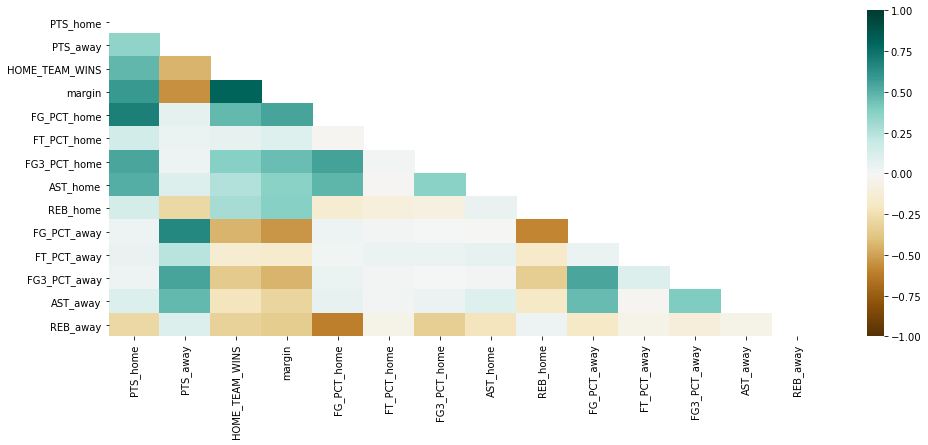

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))


heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')

In [25]:
df2.head(1)

,PTS_home,PTS_away,HOME_TEAM_WINS,margin,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
132,126.0,122.0,1,4,0.452,0.854,0.375,20.0,39.0,0.489,0.818,0.56,30.0,49.0


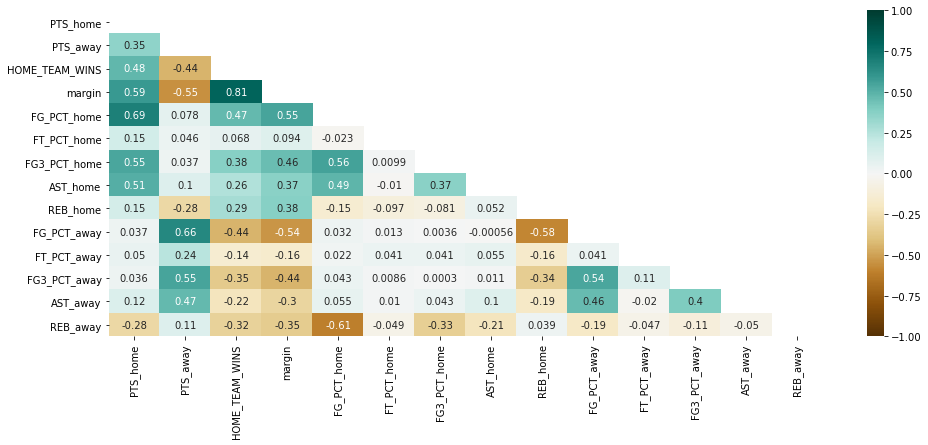

In [28]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))


heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [26]:
len(df2)

800

Correlation between fg_pct_home and reb_away is -0.61


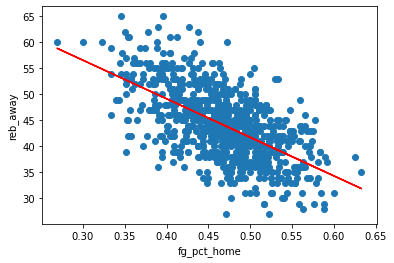

In [27]:
import scipy.stats as st
fg_pct_home = df2['FG_PCT_home']
reb_away = df2['REB_away']
cor=round(st.pearsonr(fg_pct_home, reb_away)[0], 2)
print(f'Correlation between fg_pct_home and reb_away is {cor}')
model = st.linregress(fg_pct_home, reb_away)

y_values = fg_pct_home*model[0]+ model[1]

plt.scatter(fg_pct_home, reb_away)
plt.plot(fg_pct_home, y_values, color='red')
plt.xlabel('fg_pct_home')
plt.ylabel('reb_away')
plt.show()

Correlation between fg_pct_home and reb_away is 0.55


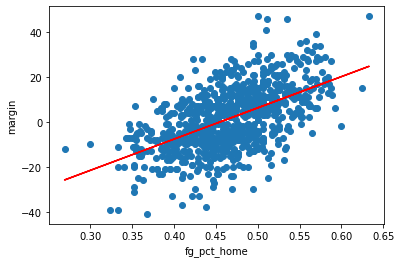

In [32]:
import scipy.stats as st
fg_pct_home = df2['FG_PCT_home']
margin = df2['margin']
cor=round(st.pearsonr(fg_pct_home, margin)[0], 2)
print(f'Correlation between fg_pct_home and reb_away is {cor}')
model = st.linregress(fg_pct_home, margin)

y_values = fg_pct_home*model[0]+ model[1]

plt.scatter(fg_pct_home, margin)
plt.plot(fg_pct_home, y_values, color='red')
plt.xlabel('fg_pct_home')
plt.ylabel('margin')
plt.show()

In [33]:
df2.head()

,PTS_home,PTS_away,HOME_TEAM_WINS,margin,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
132,126.0,122.0,1,4,0.452,0.854,0.375,20.0,39.0,0.489,0.818,0.560,30.0,49.0
133,117.0,109.0,1,8,0.500,0.643,0.514,27.0,51.0,0.414,0.913,0.421,27.0,41.0
134,109.0,92.0,1,17,0.483,0.727,0.395,32.0,51.0,0.356,0.741,0.263,14.0,48.0
135,107.0,103.0,1,4,0.400,0.692,0.324,23.0,61.0,0.358,0.591,0.318,18.0,48.0
136,96.0,134.0,0,-38,0.438,0.875,0.250,25.0,27.0,0.563,0.818,0.474,31.0,51.0


TUTORIAL

```
for i in range(0,10):
    print(i)
    ```

In [124]:
predicted_df['Random_Generator'] = empty_l


NameError: name 'empty_l' is not defined

In [128]:
empty_2 = []

In [134]:
empty_l = []


In [187]:
from sklearn.metrics import accuracy_score

empty_l = []

for i in range(0,200):
    empty_l.append(round(random.uniform(0,1)))
predicted_df['Random_Generator'] = empty_l
predicted_values = predicted_df['Random_Generator'].tolist()
actual_values = predicted_df['Actual'].tolist()
empty_2.append(accuracy_score(predicted_values, actual_values))

In [190]:
len(empty_2)

49

In [189]:
import statistics 

print(statistics.mean(empty_2))
# list of positive integer numbers 

0.5084693877551021


### Summarize

Summarize this and what does this mean
If you were to grab the average prediction of NBA teams a random number generator would be 51% accurate after 49 tries


In [115]:
len(predicted_df)

200

In [114]:
from sklearn.metrics import accuracy_score
import random

    
empty_2 = []    
for i in range(5):
    for i in range(0,200):
        empty_1 = []
        empty_1.append(round(random.uniform(0, 1)))
       

ValueError: Length of values does not match length of index

In [110]:
empty_2

[0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55]

In [ ]:
# make a histogram
# of randomly selected numbers: 

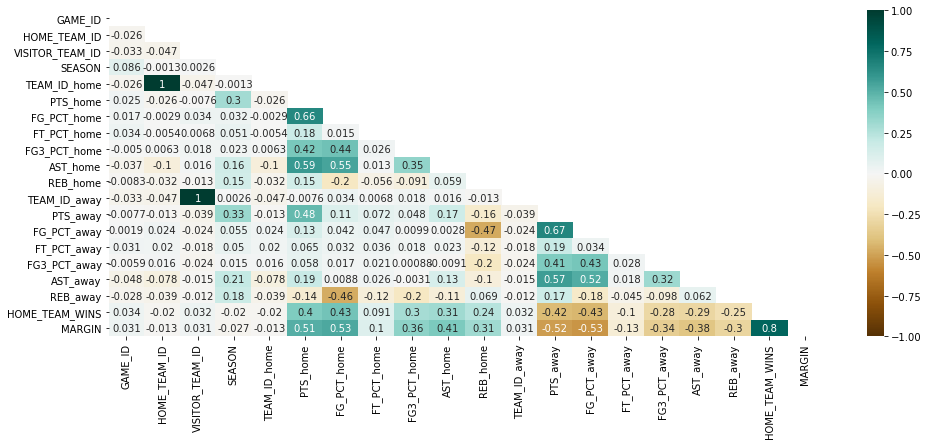

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')